In [5]:
import goobergrad.nn as nn
from goobergrad import eval
from goobergrad.nn import Value

In [6]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

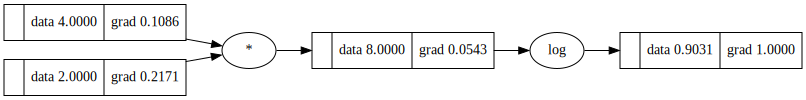

In [7]:
a = nn.Value(4.0)
b = a * 2
c = b.log()
c.backward()
draw_dot(c)


In [8]:
model = nn.MLP([1,5, 4], 20)

In [9]:
model.layers[1].neurons[0]._activation

False

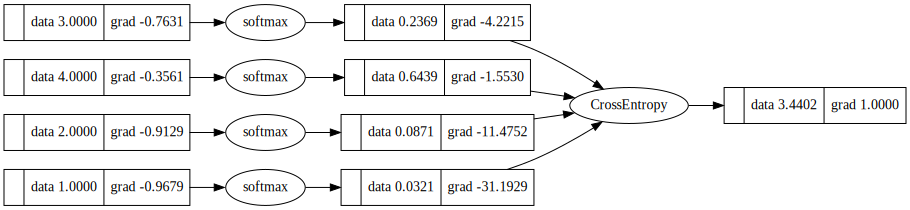

In [10]:
ypred = [Value(1.0), Value(2.0), Value(3.0), Value(4.0)]
ytrue = (1, 0, 0, 0)

ypred = nn.softmax(ypred)

loss = eval.CrossEntropy(ypred, ytrue)
loss.backward()

draw_dot(loss)

In [32]:
model = nn.MLP([3, 400, 400, 3], 2)

In [33]:
X = [[3, 1, 0],
    [4, 1, 2],
     [-1, 2, 3],
     [2, 2, 2]
    ]

"""
Y = [
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
]
"""
Y = [
    [4, 8, 9],
    [1, 2, 3],
    [-4, 0, 6],
    [1, 8, 8]
    ]

def toval(x):
    return [Value(xp) for xp in x]

Y = list(map(toval, Y))
Y

[[Value(4), Value(8), Value(9)],
 [Value(1), Value(2), Value(3)],
 [Value(-4), Value(0), Value(6)],
 [Value(1), Value(8), Value(8)]]

In [ ]:
for i in range(500):
    for x, y in zip(X, Y):
        y = nn.softmax(y)
        model.zero_grad()
        ypred = model(x)
        
        loss = eval.RMSE(ypred, y)
        
        
        loss.backward()
        model.step(.05, False)
        print(f'loss: {loss}')
        

loss: Value(3.2803767857682122)
loss: Value(2851.6560164212597)
loss: Value(1379.118754759082)
loss: Value(24899.688836332312)
loss: Value(1781.4601455486613)
loss: Value(1908.118711871849)
loss: Value(260.7099548791088)
loss: Value(4747.557293307695)
loss: Value(3.816349233855965)
loss: Value(639.8949969573271)
loss: Value(1074.8265949805077)
loss: Value(8.5584036580116)
loss: Value(38.637710044297194)
loss: Value(9.668905371052178)
loss: Value(72.05574420800377)
loss: Value(0.8900136162721466)
loss: Value(0.21092983495526657)
loss: Value(0.208227070649531)
loss: Value(2.7647610373353104)
loss: Value(0.3787673898007255)
loss: Value(0.077342704136317)
loss: Value(0.0011351846008245572)
loss: Value(0.9447769243259063)
loss: Value(0.40713771403181515)
loss: Value(0.03502995642275415)
loss: Value(0.0024714458582494564)
loss: Value(0.15878676933530572)
loss: Value(0.3573441010087812)
loss: Value(0.031972958401698656)
loss: Value(0.007525006298760925)
loss: Value(0.0035557071977219516)
loss